In [151]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [152]:
df = pd.read_csv("../csv/hasil_ekstraksi_rata2_hsv_training.csv")
df

,label,H,S,V
0,1,81.974577,102.584973,168.376517
1,1,54.737978,91.916578,146.841428
2,1,76.855214,96.200118,160.534384
3,1,76.855214,96.200118,160.534384
4,1,33.478151,103.161639,147.159878
...,...,...,...,...
195,5,83.991077,82.608059,155.094844
196,5,83.991077,82.608059,155.094844
197,5,86.196517,71.111233,170.544318
198,5,86.196517,71.111233,170.544318


In [153]:
X = df.drop(columns="label")
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (40, 3), (160,), (40,))

In [154]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [155]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [156]:
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()

model.fit(X_train_scaled, y_train)


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [ ]:
predictions = model.predict(X_test_scaled)

print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           1       0.50      0.50      0.50         4
           2       1.00      1.00      1.00        13
           3       0.45      0.83      0.59         6
           4       1.00      0.44      0.62         9
           5       0.62      0.62      0.62         8

    accuracy                           0.73        40
   macro avg       0.72      0.68      0.67        40
weighted avg       0.79      0.72      0.73        40



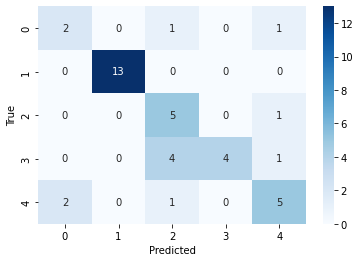

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# menghitung confusion matrix
conf_mat = confusion_matrix(y_test, predictions)

sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# import joblib

# # simpan model dalam file .pkl
# joblib.dump(model, 'NaiveBayes.pkl')

In [ ]:
x_pred = pd.read_csv("../csv/hasil_ekstraksi_rata2_hsv_testing.csv")
x_pred

,H,S,V
0,75.729207,143.896614,171.584803
1,82.076242,92.058603,188.019142
2,81.025352,115.197752,175.925893
3,83.869878,121.008110,158.315995
4,89.591180,122.983177,182.470417
5,96.042360,103.192065,178.292771
6,85.100154,120.321136,188.340366
7,96.222900,112.547039,179.969918
8,92.305871,84.218896,148.585724
9,88.543263,90.975482,168.879704


In [ ]:
model.predict(x_pred)

C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [ ]:
x_pred["label"] = model.predict(x_pred)
x_pred

C:\Users\makba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


,H,S,V,label
0,75.729207,143.896614,171.584803,1
1,82.076242,92.058603,188.019142,1
2,81.025352,115.197752,175.925893,1
3,83.869878,121.008110,158.315995,1
4,89.591180,122.983177,182.470417,1
5,96.042360,103.192065,178.292771,1
6,85.100154,120.321136,188.340366,1
7,96.222900,112.547039,179.969918,1
8,92.305871,84.218896,148.585724,1
9,88.543263,90.975482,168.879704,1
